In [34]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

from scipy import stats
from scipy.stats import t

In [ ]:
df = pd.read_excel("../../data/df_scaled.xlsx")
df.head()

In [ ]:
df.info()

In [33]:
selected_vars = [
    'SCORE', 'ESTADOCIVIL', 'GÉNERO', 'NIVEL_ESTUDIOS_ORD',
    'TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG', 'PASIVOS', 'ACTIVOS',
    'SALDO CAPITAL', 'EDAD', 'ESTRATO'
]

niveles_educativos = [
    'Primaria',
    'Bachillerato',
    'Técnico',
    'Tecnólogo',
    'Licenciatura',
    'Universitario',
    'Especialización',
    'Maestría',
    'Doctorado / Postdoctorado'
]

orden_niveles = {
    'Primaria': 0,
    'Bachillerato': 1,
    'Técnico': 2,
    'Tecnólogo': 3,
    'Licenciatura': 4,
    'Universitario': 5,
    'Especialización': 6,
    'Maestría': 7,
    'Doctorado / Postdoctorado': 8
}

df['NIVEL_ESTUDIOS_ORD'] = df['NIVEL ESTUDIOS'].map(orden_niveles)

IndentationError: unexpected indent (3005730216.py, line 32)

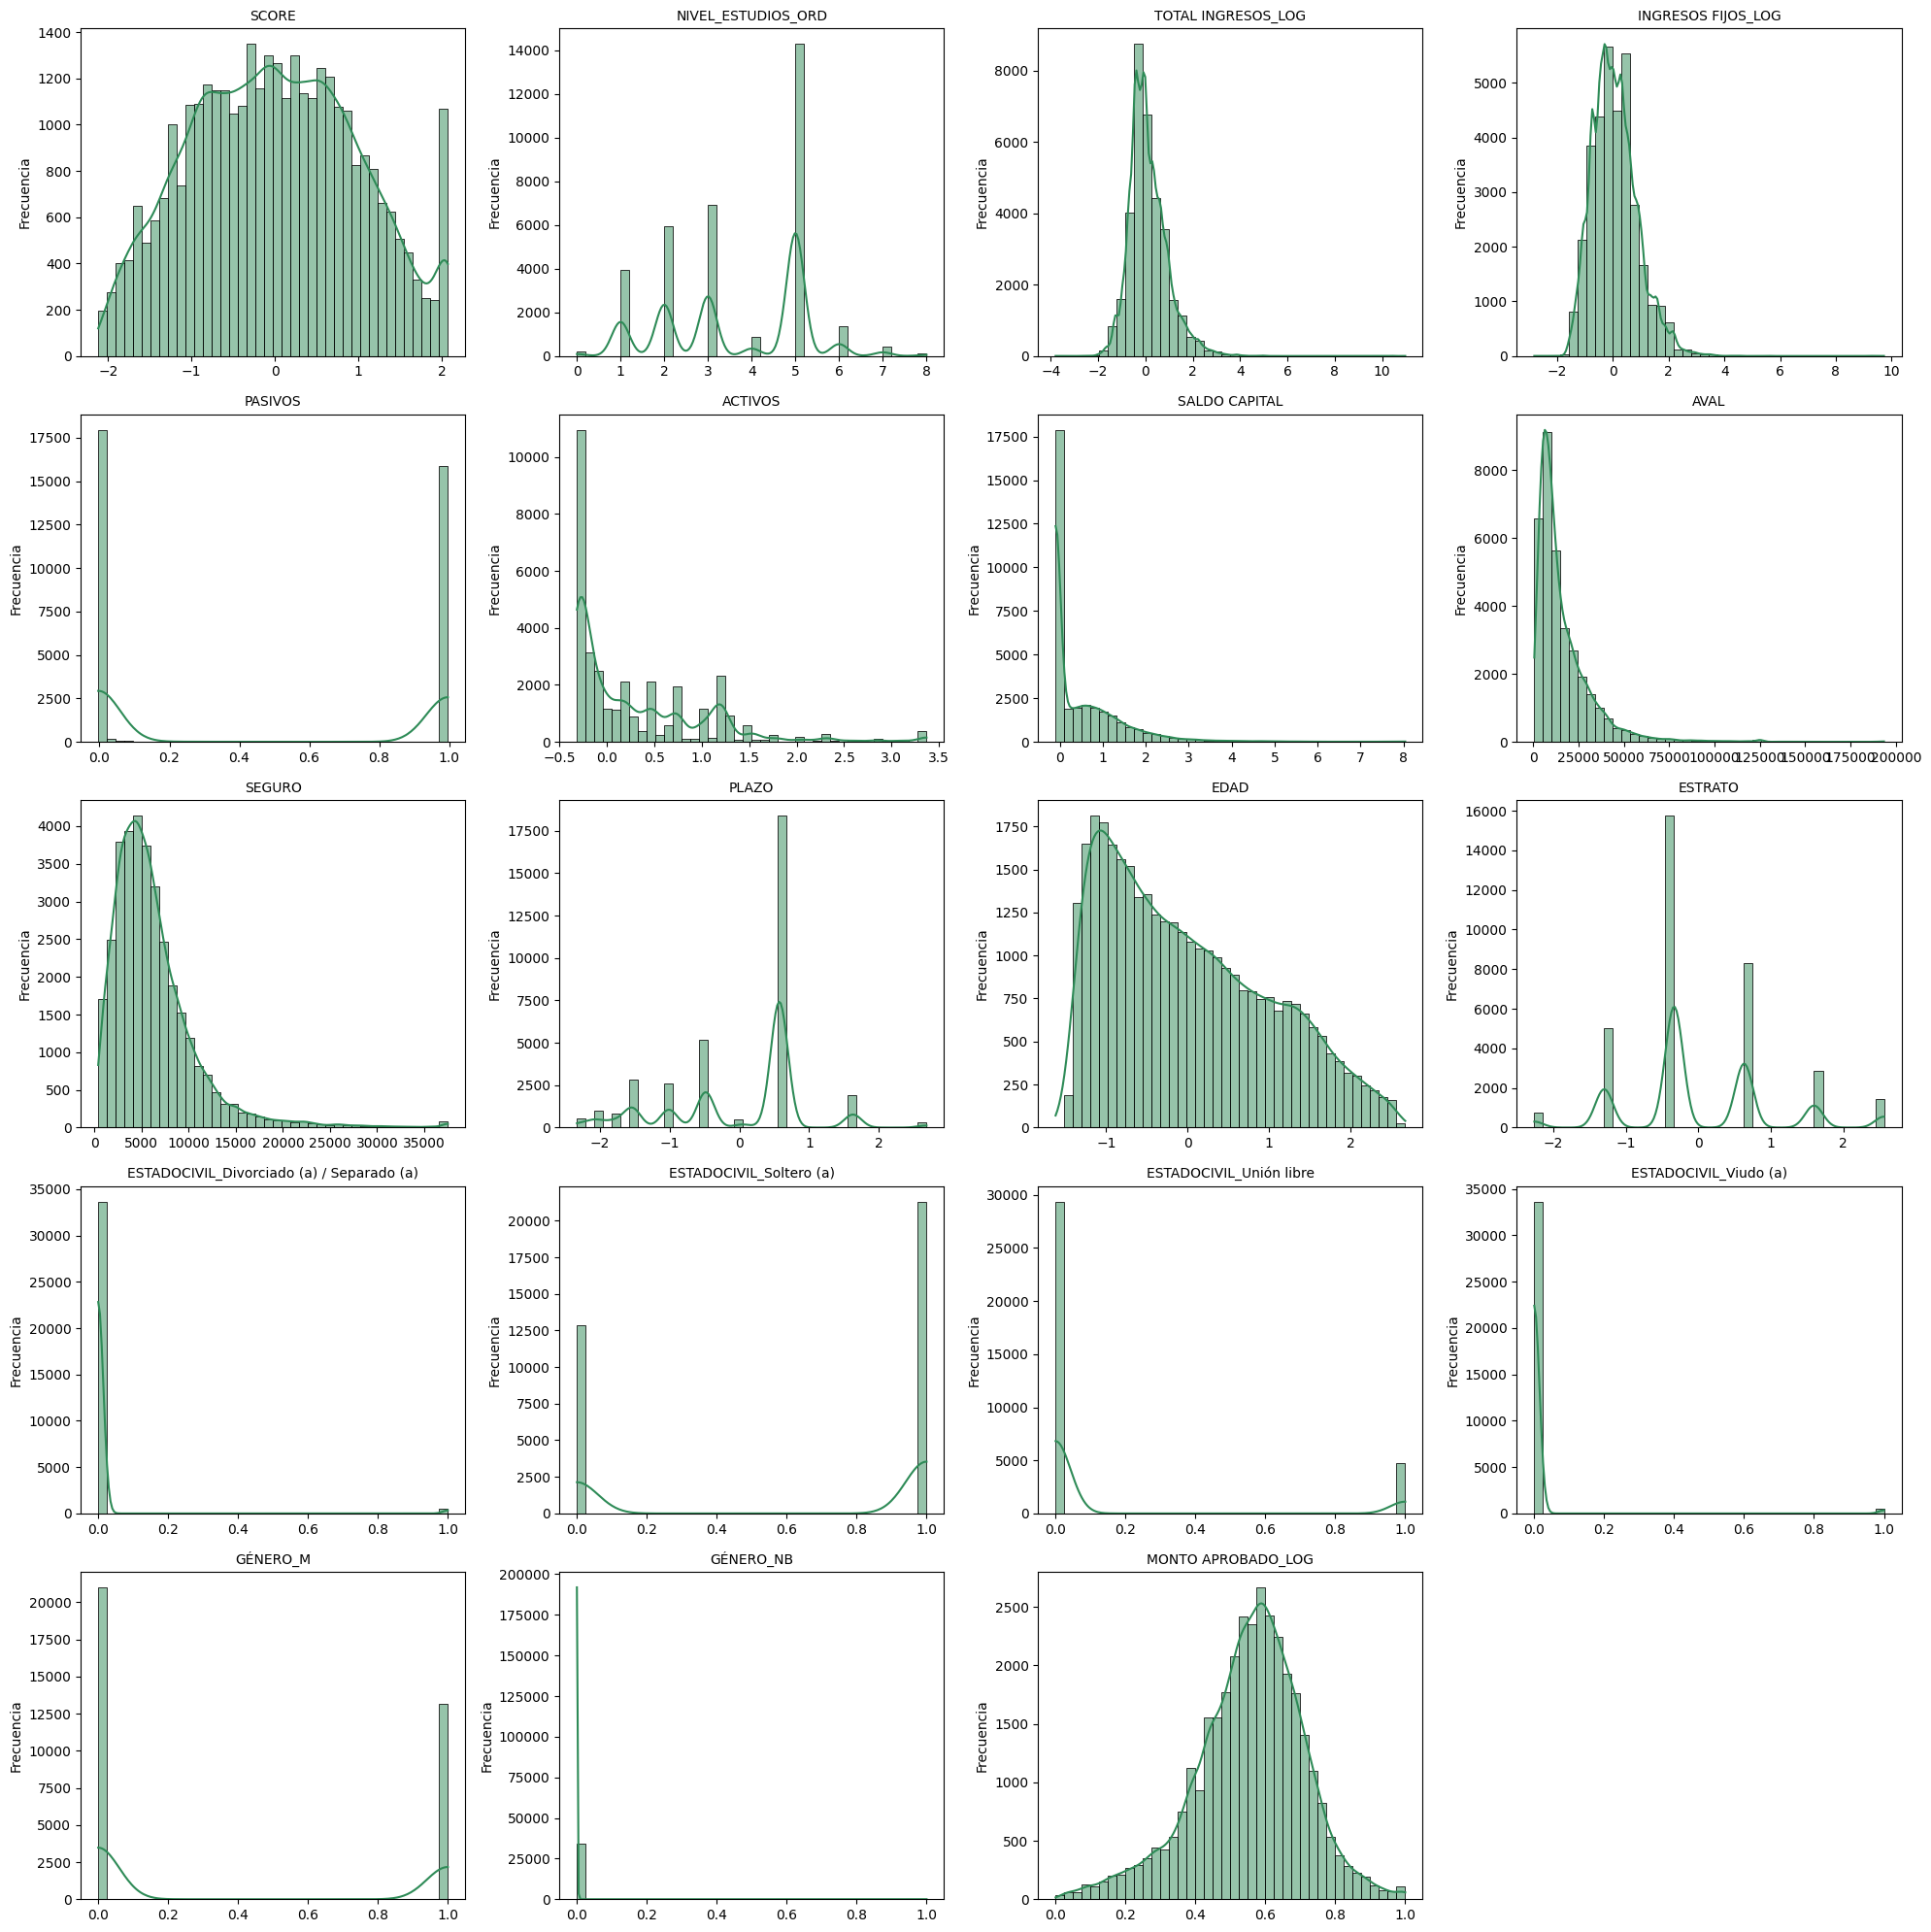

In [16]:
X_full = pd.concat([X, df[['MONTO APROBADO_LOG']]], axis=1)

n_cols = len(X_full.columns)

n_rows = (n_cols // 4) + 1

plt.figure(figsize=(20, 4*n_rows))

for i, col in enumerate(X_full.columns, 1):
    plt.subplot(n_rows, 4, i)
    sns.histplot(X_full[col], bins=40, kde=True, color="seagreen")
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [17]:


# Variables numéricas continuas
num_vars = ['TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG', 'PASIVOS',
            'ACTIVOS', 'SALDO CAPITAL', 'PLAZO', 'EDAD']

# 1. Transformación para sesgo (Box-Cox/Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(df[num_vars])

# 2. Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)


In [31]:

cols = [
    'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'TOTAL INGRESOS_LOG', 
    'INGRESOS FIJOS_LOG', 'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG',
    'ACTIVOS', 'SCORE'
]


X_scaled_df = pd.DataFrame(X_scaled, columns=num_vars)

X_plot = X_scaled_df[cols]

n_cols = len(X_plot.columns)
n_rows = (n_cols // 4) + 1

plt.figure(figsize=(20, 4*n_rows))

for i, col in enumerate(X_plot.columns, 1):
    plt.subplot(n_rows, 4, i)
    sns.histplot(X_plot[col], bins=40, kde=True, color="seagreen")
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


KeyError: "['SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG', 'CUOTAMENSUAL', 'SCORE'] not in index"

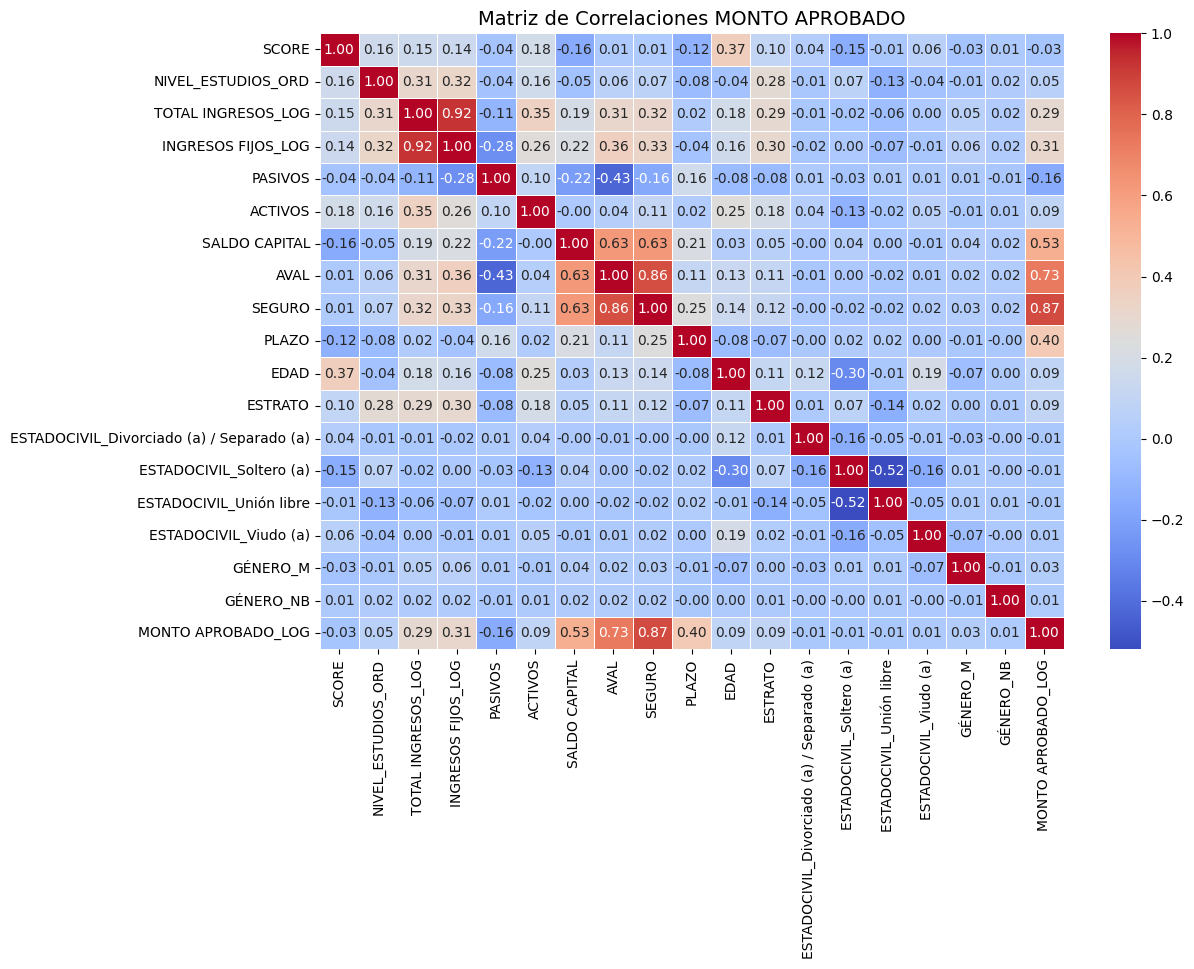

In [18]:
corr_matrix = pd.concat([X, df[['MONTO APROBADO_LOG']]], axis=1).corr()

# Graficar con seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones MONTO APROBADO", fontsize=14)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 2. Modelo De Regresión Lineal Múltiple
---

In [20]:
# Entrenar modelo
modelo_lin = LinearRegression()
modelo_lin.fit(X_train, y_train)

# Predicciones
y_train_pred = modelo_lin.predict(X_train)
y_test_pred  = modelo_lin.predict(X_test)

In [21]:
# Métricas en train
R2_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)

# Métricas en test
R2_test = r2_score(y_test, y_test_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)

In [22]:
# Modelo Lineal Coefficient
coeficientes = modelo_lin.coef_

In [23]:
X.columns

Index(['SCORE', 'NIVEL_ESTUDIOS_ORD', 'TOTAL INGRESOS_LOG',
       'INGRESOS FIJOS_LOG', 'PASIVOS', 'ACTIVOS', 'SALDO CAPITAL', 'AVAL',
       'SEGURO', 'PLAZO', 'EDAD', 'ESTRATO',
       'ESTADOCIVIL_Divorciado (a) / Separado (a)', 'ESTADOCIVIL_Soltero (a)',
       'ESTADOCIVIL_Unión libre', 'ESTADOCIVIL_Viudo (a)', 'GÉNERO_M',
       'GÉNERO_NB'],
      dtype='object')

In [24]:
print("=== Evaluación Regresión Múltiple ===")
print(f"Intercepto: {modelo_lin.intercept_:.4f}\n\n")

for i in range(len(coeficientes)):
    print(f"{X.columns[i]} : {coeficientes[i]:.4f}")

print(f"\n\nNúmero de coeficientes: {len(modelo_lin.coef_)}\n")

print(f"Train - R^2: {R2_train:.4f}")
print(f"Train - MSE: {MSE_train:.4f}")
print(f"Train - MAE: {MAE_train:.4f}\n")

print(f"Test  - R^2: {R2_test:.4f}")
print(f"Test  - MSE: {MSE_test:.4f}")
print(f"Test  - MAE: {MAE_test:.4f}")

=== Evaluación Regresión Múltiple ===
Intercepto: 0.3929


SCORE : -0.0037
NIVEL_ESTUDIOS_ORD : -0.0006
TOTAL INGRESOS_LOG : -0.0105
INGRESOS FIJOS_LOG : 0.0196
PASIVOS : -0.0231
ACTIVOS : 0.0001
SALDO CAPITAL : -0.0084
AVAL : -0.0000
SEGURO : 0.0000
PLAZO : 0.0326
EDAD : -0.0014
ESTRATO : -0.0000
ESTADOCIVIL_Divorciado (a) / Separado (a) : 0.0033
ESTADOCIVIL_Soltero (a) : 0.0007
ESTADOCIVIL_Unión libre : 0.0047
ESTADOCIVIL_Viudo (a) : -0.0040
GÉNERO_M : 0.0022
GÉNERO_NB : -0.0091


Número de coeficientes: 18

Train - R^2: 0.7955
Train - MSE: 0.0050
Train - MAE: 0.0504

Test  - R^2: 0.8056
Test  - MSE: 0.0048
Test  - MAE: 0.0500


## 3. Modelo Stepwise Regression

In [25]:
# Perform stepwise regression
sfs = SequentialFeatureSelector(modelo_lin,
                                k_features = 3,
                                forward = True,
                                scoring = 'r2',
                                cv = None)
sfs.fit(X, y)
selected_features = sfs.k_feature_names_
print('The selected features are:', selected_features)

The selected features are: ('PASIVOS', 'SEGURO', 'PLAZO')


In [32]:
df['SEGURO']

0        20986
1         7712
2         1889
3         3822
4         2816
         ...  
34151     2564
34152     8001
34153     6427
34154     3068
34155     6571
Name: SEGURO, Length: 34156, dtype: int64

In [26]:
selected_features = list(selected_features)
X = df[selected_features].copy()
# Variable dependiente
y = df['MONTO APROBADO_LOG']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [27]:
# Entrenar modelo
modelo_lin = LinearRegression()
modelo_lin.fit(X_train, y_train)

# Predicciones
y_train_pred = modelo_lin.predict(X_train)
y_test_pred  = modelo_lin.predict(X_test)

# Modelo Lineal Coefficient
coeficientes = modelo_lin.coef_

In [28]:
print("=== Evaluación Regresión Múltiple ===")
print(f"Intercepto: {modelo_lin.intercept_:.4f}\n\n")

for i in range(len(coeficientes)):
    print(f"{X.columns[i]} : {coeficientes[i]:.4f}")

print(f"\n\nNúmero de coeficientes: {len(modelo_lin.coef_)}\n")

print(f"Train - R^2: {R2_train:.4f}")
print(f"Train - MSE: {MSE_train:.4f}")
print(f"Train - MAE: {MAE_train:.4f}\n")

print(f"Test  - R^2: {R2_test:.4f}")
print(f"Test  - MSE: {MSE_test:.4f}")
print(f"Test  - MAE: {MAE_test:.4f}")

=== Evaluación Regresión Múltiple ===
Intercepto: 0.3916


PASIVOS : -0.0188
SEGURO : 0.0000
PLAZO : 0.0325


Número de coeficientes: 3

Train - R^2: 0.7955
Train - MSE: 0.0050
Train - MAE: 0.0504

Test  - R^2: 0.8056
Test  - MSE: 0.0048
Test  - MAE: 0.0500


In [29]:
modelo = sm.OLS(y,X).fit()
#Sacamos beta0
beta0=modelo.params[0]
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:     MONTO APROBADO_LOG   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          8.722e+04
Date:                Thu, 20 Nov 2025   Prob (F-statistic):                        0.00
Time:                        17:35:57   Log-Likelihood:                          7260.4
No. Observations:               34156   AIC:                                 -1.451e+04
Df Residuals:                   34153   BIC:                                 -1.449e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\kirad\AppData\Local\Temp\ipykernel_29292\3343454300.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0=modelo.params[0]


## 4. Modelo Lasso Regression